In [1]:
import time
import pickle 
import warnings
import scipy
import scipy.sparse.linalg
from collections import defaultdict

from numpy import matrix, asmatrix
from scipy.sparse.sputils import asmatrix

import random
import numpy as np
import fastmat as fm  # need 0.2a3 or later?

import matplotlib.gridspec as gridspec
warnings.filterwarnings("ignore")
from pylab import rcParams
from matplotlib import container
from matplotlib import pyplot as plt
from IPython.core.display import  HTML

project_name = "sgkigp"
import os, sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.environ['PRJ'] = "~/skisg/"

#from src.nmpy.solvers import cg
random.seed(1337)
np.random.seed(1337)

%load_ext autoreload
%autoreload 2

/var/folders/gj/ns_zjdqx57b1mrqf3l8_rcd40000gp/T/ipykernel_98301/305406626.py:9: DeprecationWarning: Please use `asmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import asmatrix


In [2]:
from skisg.sginterpdemo import SparseGridInterpolator
from skisg.interp.sparse.sgindices import get_multi_index_sequence

In [3]:
## Setting up sparse grid 

level = 3
ndim = 2
sparse_grid = SparseGridInterpolator(level=level, ndim=ndim)
sparse_grid.store_points_at_mis()

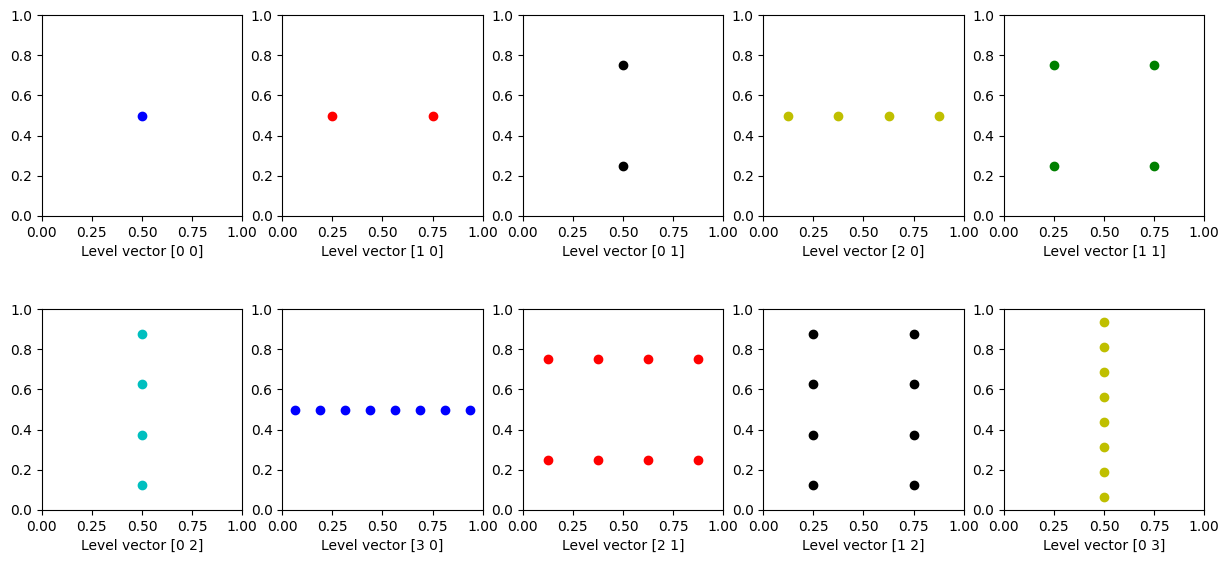

In [4]:
## Vis-level vectors 

clrs  = ['b', 'r', 'k', 'y', 'g', 'c']
fig, axs = plt.subplots(2, 5, figsize=(15,7))
axs = axs.flat 
for i, mi in enumerate(sparse_grid.mi_seqs):
    ax = axs[i]
    grid = mi.points
    ax.plot(grid[:, 0], grid[:, 1], 'o' + clrs[i%len(clrs)])
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_xlabel("Level vector " + str(mi.level))
    ax.set_aspect(1.0)
plt.show()

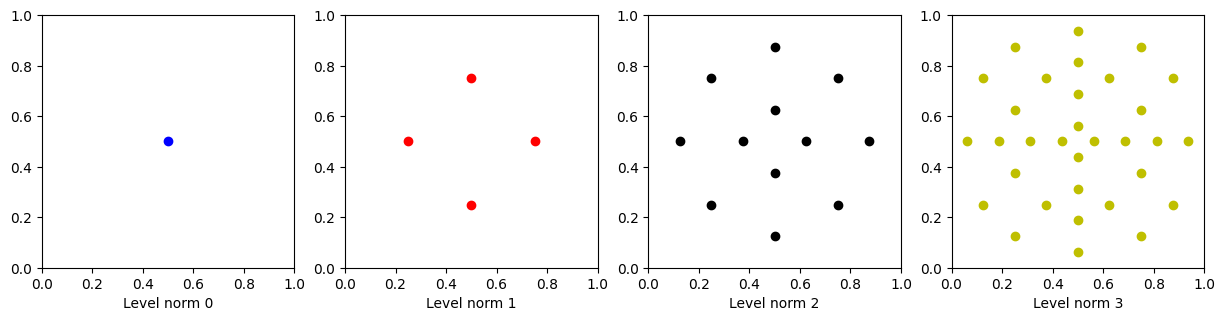

In [5]:
## Visualizing grid points with their level norm

clrs  = ['b', 'r', 'k', 'y', 'g', 'c']
levels = {}
for i, mi in enumerate(sparse_grid.mi_seqs):
    ll = np.sum(mi.level[0] + mi.level[1])
    if ll not in levels:
        levels[ll] = [mi.points]
    else:
        levels[ll] += mi.points,
    
for ll in levels.keys():
    levels[ll] = np.vstack(levels[ll])
    
fig, axs = plt.subplots(1, 4, figsize=(15,7))
axs = axs.flat 

for i, ll in enumerate(levels.keys()):    
    ax = axs[i]
    grid = levels[ll] 
    ax.plot(grid[:, 0], grid[:, 1], 'o' + clrs[i%len(clrs)])
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_xlabel("Level norm " + str(ll))
    ax.set_aspect(1.0)
plt.show()

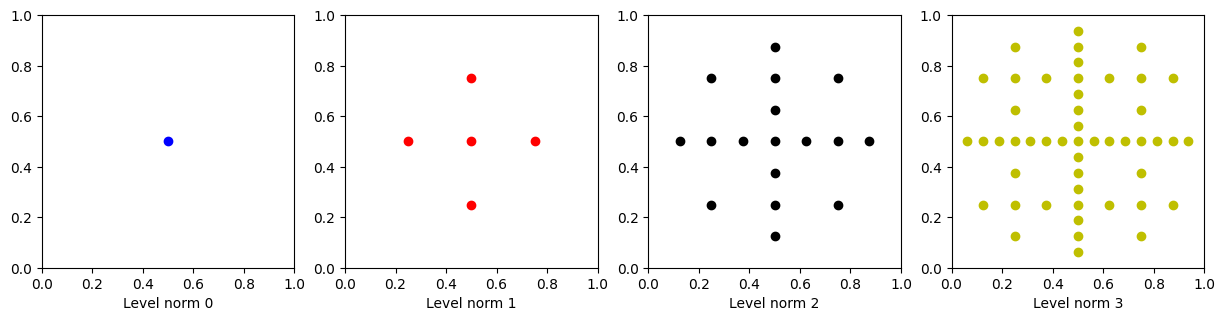

In [6]:
## Visualizing grid points wrt grid level

grid_levels = {}

for ll in levels.keys():
    points = [levels[l] for l in range(0, ll+1)]
    grid_levels[ll] = np.vstack(points)
    
fig, axs = plt.subplots(1, 4, figsize=(15,7))
axs = axs.flat 

for i, ll in enumerate(levels.keys()):    
    ax = axs[i]
    grid = grid_levels[ll] 
    ax.plot(grid[:, 0], grid[:, 1], 'o' + clrs[i%len(clrs)])
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_xlabel("Level norm " + str(ll))
    ax.set_aspect(1.0)
plt.show()